### Matrix-Vector Products
The matrix below gives the probabilities of moving from 1 health state to another in 1 year. If the current health states for a group are:

* 85% asymptomatic
* 10% symptomatic
* 5% AIDS
* 0% death

what will be the % in each health state in 1 year?

In [1]:
import numpy as np
A = np.array([[.9, .07, .02, .01],
             [0, .93, .05, .02],
             [0, 0, .85, .15],
             [0, 0, 0, 1.0]])

x = np.array([[.85, .10, .05, 0]])

A.T @ x.T

array([[0.765 ],
       [0.1525],
       [0.0645],
       [0.018 ]])

### Matrix-Matrix Products


In [2]:
A = np.array([[6, 5, 3, 1],
             [3, 6, 2, 2],
             [3, 4, 3, 1]])

B = np.array([[1.5, 1],
             [2, 2.5],
             [5, 4.5],
             [16, 17]])

A @ B

array([[50. , 49. ],
       [58.5, 61. ],
       [43.5, 43.5]])

### How convolutions can be used for edge detection

In [3]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [4]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

#### MNIST data

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/Users/adhiman/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/adhiman/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [7]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [8]:
images = np.reshape(mnist['data'], (70000, 28, 28))
labels = mnist['target'].astype(int)
n=len(images)
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [9]:
images = images/255

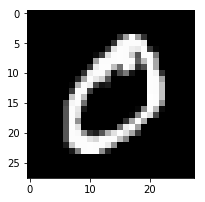

In [10]:
plot(images[0])

In [11]:
labels[0]

0

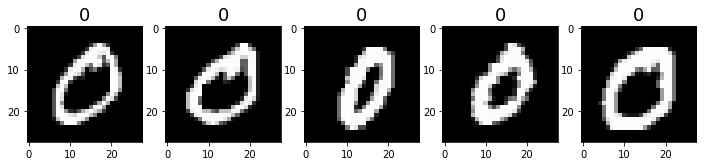

In [12]:
plots(images[:5], titles=labels[:5])

zoom to one part of the image

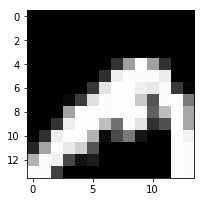

In [13]:
plot(images[0,0:14, 8:22])

**Edge Detection**

How to create an Edge detector:

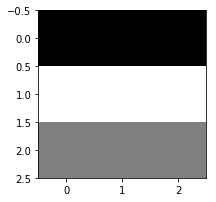

In [14]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [15]:
dims = np.index_exp[10:28:1,3:13]
images[0][dims]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1882, 0.9333, 0.9882, 0.9882],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.149 , 0.6471, 0.9922, 0.9137, 0.8157],
       [0.    , 0.    , 0.    , 0.    , 0.0275, 0.698 , 0.9882, 0.9412, 0.2784, 0.0745],
       [0.    , 0.    , 0.    , 0.    , 0.2235, 0.9882, 0.9882, 0.2471, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.7765, 0.9922, 0.7451, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.298 , 0.9647, 0.9882, 0.4392, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.902 , 0.098 , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.8745, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.5686, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3373, 0.9922, 0.8824, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.3333, 0.9882, 0.9765, 0.5725, 0.1882, 0.1137, 0.3333],
       [0.    , 0.   

In [16]:
corrtop = correlate(images[0], top)

In [17]:
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1882,  0.9216,  0.9765,  0.7843, -0.2392],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.149 ,  0.6078,  0.6667,  0.4431, -0.1882, -0.6196],
       [ 0.    ,  0.    ,  0.    ,  0.0275,  0.5765,  0.9176,  0.8392, -0.3451, -1.4275, -1.5961],
       [ 0.    ,  0.    ,  0.    ,  0.1961,  0.4863,  0.4863, -0.4039, -0.9725, -1.0471, -0.4627],
       [ 0.    ,  0.    ,  0.    ,  0.5529,  0.5569,  0.3137, -0.4863, -0.4902, -0.2471,  0.    ],
       [ 0.    ,  0.    ,  0.298 ,  0.4863,  0.4824, -0.1216, -0.3098, -0.3059,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0353,  0.0588, -0.0275, -0.4039, -0.4275, -0.3412,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.0275, -0.1255, -0.1255, -0.098 ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.3059, -0.3059, -0.3059,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0039,  0.0078,  0.3216,  0.3176,  0.3137,  0.    ,  0.    ,  0.    ],
       [ 0

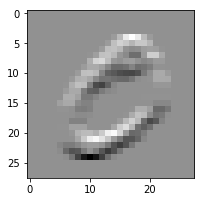

In [18]:
plot(corrtop)

In [19]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

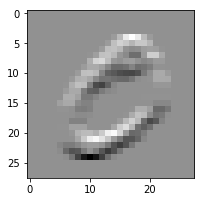

In [20]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

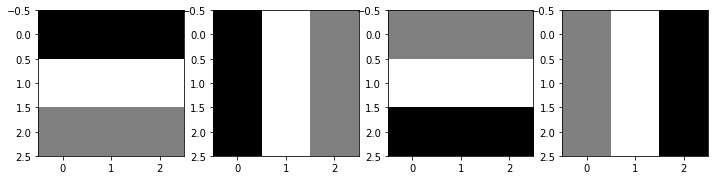

In [21]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

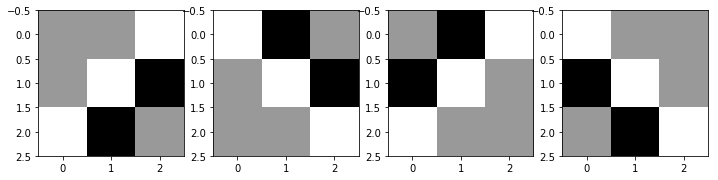

In [22]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

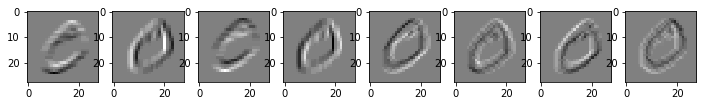

In [23]:
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

### Accuracy

**Floating Point Arithmetic**

In [24]:
def f(x):
    if x <= 1/2:
        return 2 * x
    if x > 1/2:
        return 2*x - 1

In [25]:
x = 1/10
for i in range(80):
    print(x)
    x = f(x)

0.1
0.2
0.4
0.8
0.6000000000000001
0.20000000000000018
0.40000000000000036
0.8000000000000007
0.6000000000000014
0.20000000000000284
0.4000000000000057
0.8000000000000114
0.6000000000000227
0.20000000000004547
0.40000000000009095
0.8000000000001819
0.6000000000003638
0.2000000000007276
0.4000000000014552
0.8000000000029104
0.6000000000058208
0.20000000001164153
0.40000000002328306
0.8000000000465661
0.6000000000931323
0.20000000018626451
0.40000000037252903
0.8000000007450581
0.6000000014901161
0.20000000298023224
0.4000000059604645
0.800000011920929
0.6000000238418579
0.20000004768371582
0.40000009536743164
0.8000001907348633
0.6000003814697266
0.20000076293945312
0.40000152587890625
0.8000030517578125
0.600006103515625
0.20001220703125
0.4000244140625
0.800048828125
0.60009765625
0.2001953125
0.400390625
0.80078125
0.6015625
0.203125
0.40625
0.8125
0.625
0.25
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


*Problem: math is continuous & infinite, but computers are discrete & finite*

Two Limitations of computer representations of numbers:

1. they can't be arbitrarily large or small
2. there must be gaps between them

The reason we need to care about accuracy, is because computers can't store infinitely accurate numbers. It's possible to create calculations that give very wrong answers (particularly when repeating an operation many times, since each operation could multiply the error).

**Conditioning and Stability**

Since we can not represent numbers exactly on a computer (due to the finiteness of our storage, and the gaps between numbers in floating point architecture), it becomes important to know how small perturbations in the input to a problem impact the output.

Conditioning: perturbation behavior of a mathematical problem (e.g. least squares)

Stability: perturbation behavior of an algorithm used to solve that problem on a computer (e.g. least squares algorithms, householder, back substitution, gaussian elimination)

*Example: Eigenvalues of a Matrix*

In [26]:
import scipy.linalg as la 

A = np.array([[1., 1000], [0, 1]])
B = np.array([[1, 1000], [0.001, 1]])

print(A)

print(B)

[[   1. 1000.]
 [   0.    1.]]
[[1.e+00 1.e+03]
 [1.e-03 1.e+00]]


In [27]:
np.set_printoptions(suppress=True, precision=4)

In [28]:
wA, vrA = la.eig(A)
wB, vrB = la.eig(B)

wA, wB

(array([1.+0.j, 1.+0.j]), array([2.+0.j, 0.+0.j]))

### Memory Use

**Sparse vs Dense**

A key way to save memory (and computation) is not to store all of your matrix. Instead, just store the non-zero elements. This is called sparse storage, and it is well suited to sparse matrices, that is, matrices where most elements are zero.

### Speed
Speed differences come from a number of areas, particularly:

* Computational complexity
* Vectorization
* Scaling to multiple cores and nodes
* Locality

### Scalability / parallelization
